# ADA 2

Eduardo Patrón Anchondo

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### Implementaciones de métodos numéricos

In [ ]:
# Método de Euler
def euler(f, t0, y0, t, h):
    N = np.size(t) - 1
    y = np.zeros(N+1)
    y[0] = y0
    for n in range(N):
        k1 = f(t[n], y[n])
        y[n+1] = y[n] + h * k1
    return np.array(y)

# Método de Heun
def heun(f, t0, y0, t, h):
    N = np.size(t) - 1
    y = np.zeros(N+1)
    y[0] = y0
    for n in range(N):
        k1 = f(t[n], y[n])
        k2 = f(t[n] + h, y[n] + h*k1)
        y[n+1] = y[n] + (h/2) * (k1 + k2)
    return np.array(y)

# Método del punto medio
def midpoint(f, t0, y0, t, h):
    N = np.size(t) - 1
    y = np.zeros(N + 1)
    y[0] = y0
    for n in range(N):
        k1 = f(t[n], y[n])
        k2 = f(t[n] + h/2, y[n] + h/2 * k1)
        y[n+1] = y[n] + h * k2
    return np.array(y)

In [ ]:
def soluciones(f, t0, tf, y0, h):
  # Grid
  t = np.linspace(t0, tf, int(abs(tf - t0)/h))

  # Métodos númericos
  y_euler = euler(f, t0, y0, t, h)
  y_heun = heun(f, t0, y0, t, h)
  y_mp = midpoint(f, t0, y0, t, h)

  return t, y_euler, y_heun, y_mp

## 1)
Resuelva la ecuación diferencial
$$ \frac{dy}{dt} = -2y +2, \quad y(0) = 1 $$
en el intervalo $t\in[0,2]$ con paso $h=0.2$. Compare las soluciones numéricos con la solución exacta $y(t) = 1$. Grafique las soluciones y analice cuál es el método es más preciso.

In [ ]:
# Condiciones iniciales
t0, y0 = 0, 1
tf = 2

# Tamaño de paso
h = 0.2

# Función
def f(t, y):
  return -2*y + 2

# Sol Exacta
def y(t):
  return 1*np.ones(len(t))

# Métodos
t, y_euler, y_heun, y_mp = soluciones(f, t0, tf, y0, h)

In [ ]:
plt.plot(t, y_euler, 'b', label = 'Euler')
plt.plot(t, y_heun, 'g', label = 'Heun')
plt.plot(t, y_mp, 'r', label = 'Punto Medio')
plt.plot(t, y(t), '--', label ='Exacta')

plt.title('Comparación de los métodos: Ejer 1')
plt.grid(True)
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.savefig('Ejer1', dpi = 300)
plt.show()

## 2)
Resuelva la ecuación no lineal
$$ \frac{dy}{dt} = y(1-y), \quad y(0) = 0.1$$
en $t\in[0,5]$ con paso $h=0.5$. Compare la evolución y estabilidad de los tres métodos. Discuta cómo el tamaño del paso afecta la precisión de cada uno.

In [ ]:
# Condiciones iniciales
t0, y0 = 0, 0.1
tf = 5

# Tamaño de paso
h = 0.5

# Función
def f(t, y):
  return y*(1-y)

# Métodos
t, y_euler, y_heun, y_mp = soluciones(f, t0, tf, y0, h)

In [ ]:
plt.plot(t, y_euler, 'b', label = 'Euler')
plt.plot(t, y_heun, 'g', label = 'Heun')
plt.plot(t, y_mp, 'r', label = 'Punto Medio')

plt.title('Comparación de los métodos: Ejer. 2')
plt.grid(True)
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.savefig('Ejer2', dpi = 300)
plt.show()

## 3)
Resuelva
$$ \frac{dy}{dt} = t^2 - y, \quad y(0) =1$$
en $t\in[0,3]$ con paso $h = 0.3$. Compare los tres métodos con la solución analítica, evalúe el error global en el tiempo final y  discuta cómo varía con el tamaño de paso.

In [ ]:
# Condiciones iniciales
t0, y0 = 0, 1
tf = 3

# Tamaño de paso
h = 0.2

# Función
def f(t, y):
  return t**2 - y

# Solución analítica
def y(t):
  return -np.exp(-t) + t**2 - 2*t + 2

# Métodos
t, y_euler, y_heun, y_mp = soluciones(f, t0, tf, y0, h)

In [ ]:
err_final = (np.abs(y(t) - y_euler)[-1], np.abs(y(t) - y_heun)[-1], np.abs(y(t) - y_mp)[-1])

In [ ]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (16.8,9), layout='constrained')

axs[0].plot(t, y_euler, 'b', label = 'Euler')
axs[0].plot(t, y_heun, 'g', label = 'Heun')
axs[0].plot(t, y_mp, 'r', label = 'Punto Medio')
axs[0].plot(t, y(t), '--', label = 'Exacta')

axs[0].set_title('Comparación de los métodos: Ejer. 3')
axs[0].grid(True)
axs[0].set_xlabel('t')
axs[0].set_ylabel('y')
axs[0].legend()

# Histograma de los errores finales
axs[1].bar( ('Euler', 'Heun', 'Punto Medio'), err_final, color = ['blue', 'green', 'red'] )

axs[1].set_title('Error en el tiempo final')

plt.savefig('Ejer3', dpi = 300)
plt.show()

## 4)
Para la ecuación $dy/dt = -y, y(0) =1$, calcule la solución numérica con pasos $h = 0.5, 0.25, 0.1, 0.05$. Para cada método, gráfique el error final vs. $h$ en escala log-log y analice el orden de convergencia de cada uno.

In [ ]:
# Condiciones iniciales
t0, y0 = 0, 1
tf = 1

# Tamaños de paso
h = (0.5, 0.25, 0.1, 0.05)

# Función
def f(t, y):
  return -y

# Sol exacta
def sol(t):
  return np.exp(-t)

In [ ]:
# Métodos
def grids(h, t0, tf):
  sizes = tuple(map(lambda x: int((tf - t0) / x), h))
  x = []
  for N in sizes:
    grid = np.linspace(t0, tf, N +1 )
    x.append(grid)
  return x

# Generador de soluciones
def sol_num(method, x, h, f, t0, y0):
  """
    Se generan tantas soluciones como grids y stepsize dados
  """
  y = []
  for x, h in zip(x, h):
    y.append(method(f, t0, y0, x, h))
  return y

# Mallas
x = grids(h, t0, tf)

# Soluciones numéricas
y_euler = sol_num(euler, x, h, f, t0, y0)
y_heun = sol_num(heun, x, h, f, t0, y0)
y_mp = sol_num(midpoint, x, h, f, t0, y0)

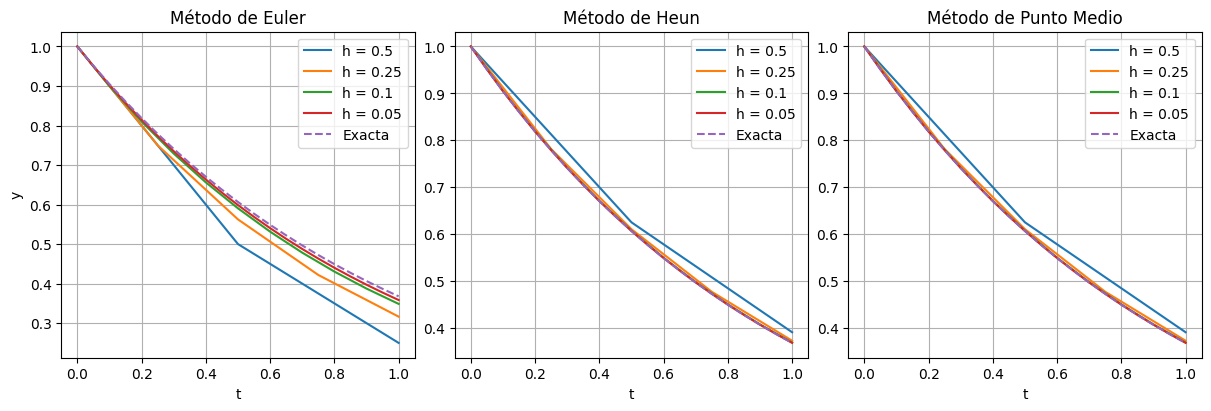

In [ ]:
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (12, 4), layout='constrained')
# Euler
for step, grid, y in zip(h, x, y_euler):
  axs[0].plot(grid, y, label = f'h = {step}')

axs[0].plot(x[-1], sol(x[-1]), '--', label = 'Exacta')

axs[0].set_title('Método de Euler')
axs[0].grid(True)
axs[0].set_ylabel('y')
axs[0].set_xlabel('t')
axs[0].legend()

# Heun
for step, grid, y in zip(h, x, y_heun):
  axs[1].plot(grid, y, label = f'h = {step}')

axs[1].plot(x[-1], sol(x[-1]), '--', label = 'Exacta')

axs[1].set_title('Método de Heun')
axs[1].grid(True)
axs[1].set_xlabel('t')
axs[1].legend()

# Midpoint
for step, grid, y in zip(h, x, y_mp):
  axs[2].plot(grid, y, label = f'h = {step}')

axs[2].plot(x[-1], sol(x[-1]), '--', label = 'Exacta')

axs[2].set_title('Método de Punto Medio')
axs[2].grid(True)
axs[2].set_xlabel('t')
axs[2].legend()

plt.savefig('Ejer4_1.png', dpi = 300)
plt.show()

In [ ]:
# Errores máximos
def err_max(x, y_num, y):
  err_max = []
  for j in range(len(x)):
    err_max.append(np.max(np.abs(y_num[j].reshape(1,-1) - y(x[j]))))
  return err_max

euler_errmax = err_max(x, y_euler, sol)
heun_errmax = err_max(x, y_heun, sol)
midpoint_errmax = err_max(x, y_mp, sol)

In [ ]:
# Aproximación del orden
def aprox_ord(errmax):
  ord = []
  for h, h2 in zip(errmax[:-1], errmax[1:]):
    ord.append(np.log2(h/h2))
  return ord

euler_ord = aprox_ord(euler_errmax)
heun_ord = aprox_ord(heun_errmax)
midpoint_ord = aprox_ord(midpoint_errmax)

print(f'El orden aproximado de Euler es {np.mean(euler_ord):.4f}')
print(f'El orden aproximado de Heun es {np.mean(heun_ord):.4f}')
print(f'El orden aproximado de Punto Medio es {np.mean(midpoint_ord):.4f}')

El orden aproximado de Euler es 1.2165
El orden aproximado de Heun es 2.3863
El orden aproximado de Punto Medio es 2.3863


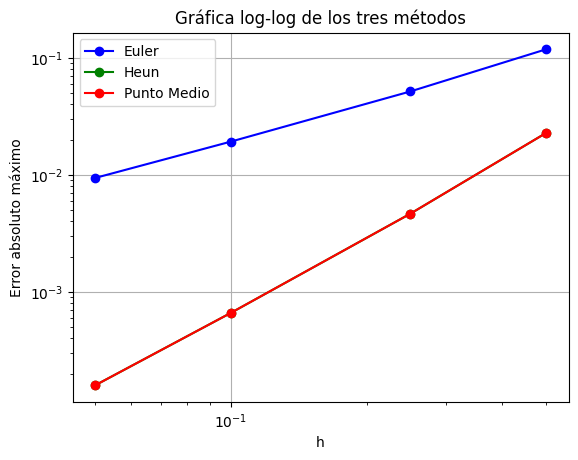

In [ ]:
# Gráfica log-log
plt.loglog(h, euler_errmax, '-ob', label = 'Euler')
plt.loglog(h, heun_errmax, '-og', label = 'Heun')
plt.loglog(h, midpoint_errmax, '-or', label = 'Punto Medio')

plt.title('Gráfica log-log de los tres métodos')
plt.xlabel('h')
plt.ylabel('Error absoluto máximo')
plt.grid(True)
plt.legend()
plt.savefig('Ejer4_2', dpi = 300)
plt.show()

## 5)
Resuelva el sistema de ecuaciones
$$ \left. \frac{dx}{dt} = x + y \atop \frac{dy}{dt} = -x + y \right., \quad x(0) = 1, \quad y(0) = 0 $$

en $t\in[0,2]$ con paso $h=0.1$. Grafique la trayectoria $(x(t),y(t))$ y compare el error y comportamiento cualitativo de los métodos.

In [ ]:
# Condiciones iniciales
t0, y0 = 0, [1, 0]
tf = 2

# Tamaño de paso
h = 0.1
t = np.linspace(t0, tf, int( (tf -t0)/h ))

# Función
def f(t, y):
  return np.array([y[0]+y[1], -y[0]+y[1]])

In [ ]:
# Método de Euler
def euler_2var(f, t0, y0, t, h):
    N = np.size(t) - 1
    y = np.zeros((N+1, 2))
    y[0] = y0
    for n in range(N):
        k1 = f(t[n], y[n])
        y[n+1] = y[n] + h * k1
    return np.array(y)

# Método de Heun
def heun_2var(f, t0, y0, t, h):
    N = np.size(t) - 1
    y = np.zeros((N+1, 2))
    y[0] = y0
    for n in range(N):
        k1 = f(t[n], y[n])
        k2 = f(t[n] + h, y[n] + h*k1)
        y[n+1] = y[n] + (h/2) * (k1 + k2)
    return np.array(y)

# Método del punto medio
def midpoint_2var(f, t0, y0, t, h):
    N = np.size(t) - 1
    y = np.zeros((N + 1, 2))
    y[0] = y0
    for n in range(N):
        k1 = f(t[n], y[n])
        k2 = f(t[n] + h/2, y[n] + h/2 * k1)
        y[n+1] = y[n] + h * k2
    return np.array(y)

In [ ]:
y_euler = euler_2var(f, t0, y0, t, h)
y_heun = heun_2var(f, t0, y0, t, h)
y_mp = midpoint_2var(f, t0, y0, t, h)

In [ ]:
def sol(t):
  x = np.exp(t)*np.cos(t)
  y = - np.exp(t)*np.sin(t)
  return x,y

x, y = sol(t)

In [ ]:
def norm(num):
  return np.sqrt( (num[:, 0] - x)**2 + (num[:,1] - y)**2)

err_euler = norm(y_euler)
err_heun = norm(y_heun)
err_mp = norm(y_mp)

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (8, 4), layout='constrained')

ax[0].plot(y_euler[:,0], y_euler[:,1], 'b', label = 'Sol Euler')
ax[0].plot(y_heun[:,0], y_heun[:,1], 'g', label = 'Sol Heun')
ax[0].plot(y_mp[:,0], y_mp[:, 1], 'r', label = 'Sol Punto Medio')
ax[0].plot(x, y, '--', label = 'Sol Analítica')
ax[0].plot(1, 0, 'o', color = 'black')

ax[0].set_title('Comparación de métodos para 2 variables')
ax[0].legend()
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].grid(True)

ax[1].plot(t, err_euler, 'b', label = 'Euler')
ax[1].plot(t, err_heun, 'g', label = 'Heun')
ax[1].plot(t, err_mp, 'r', label = 'Punto Medio')

ax[1].set_title('Errores de los métodos')
ax[1].set_ylabel('Error')
ax[1].set_xlabel('t')
ax[1].grid(True)
ax[1].legend()

plt.savefig('Ejer5', dpi = 300)
plt.show()